# Loading data from .bin files

If you are viewing this using GitHub's notebook renderer: Sorry for the unsightly appearance of the xarray objects. Rest assured that they render nicely in VSCode or JupyterLab...

In [1]:
from .sglxr import load_trigger
from .examples import example_data_path
from IPython.display import display

lfp_bin_path = example_data_path()
print(f"Loading: {lfp_bin_path}")
lfp = load_trigger(lfp_bin_path)
# You could also load data specifying specific channels labels and/or segment start and end times,
# including valid datetime strings. See function docstring for details.


Loading: /home/gfindlay/projects/sglxarray_dev/sglxarray/sglxarray/data/example-data.exported.imec0.lf.bin
nChan: 385, nFileSamp: 50000


In [2]:
# View loaded data
# Note that x and y coordinates of each channel are automatically loaded from the metadata.
lfp


<xarray.DataArray (time: 50000, channel: 384)>
array([[  28.125 ,   37.5   ,   -4.6875, ...,   98.4375,  192.1875,
         107.8125],
       [  32.8125,   32.8125,   -4.6875, ...,   60.9375,  173.4375,
         107.8125],
       [  32.8125,   14.0625,  -14.0625, ...,   70.3125,  182.8125,
         103.125 ],
       ...,
       [  98.4375,   89.0625,   75.    , ..., -107.8125,   23.4375,
          -4.6875],
       [  89.0625,   84.375 ,   60.9375, ...,  -98.4375,   28.125 ,
          14.0625],
       [  79.6875,   75.    ,   46.875 , ...,  -84.375 ,   32.8125,
           9.375 ]])
Coordinates:
  * time       (time) float64 0.0 0.0004 0.0008 0.0012 ... 20.0 20.0 20.0 20.0
  * channel    (channel) int64 0 3 4 7 8 11 12 ... 370 373 374 377 378 381 382
    timedelta  (time) timedelta64[ns] 00:00:00 ... 00:00:19.999579888
    datetime   (time) datetime64[ns] 2020-03-18T15:07:29 ... 2020-03-18T15:07...
    x          (channel) float64 27.0 43.0 27.0 43.0 ... 59.0 11.0 59.0 11.0
    y          (channel) float64 0.0 20.0 40.0 ... 7.62e+03 7.64e+03 7.66e+03
Attributes:
    units:    uV
    fs:       2500.0025140000002
    im:       CheckPat_1shank

In [3]:
# Select data using index slices.
# For example, select all data from channels 3 to 8, from t=5 to 5=15
lfp.sel(channel=slice(3, 8), time=slice(5, 15))


<xarray.DataArray (time: 25000, channel: 4)>
array([[-23.4375, -32.8125,  42.1875,  14.0625],
       [-23.4375, -42.1875,  42.1875,  14.0625],
       [-18.75  , -32.8125,  37.5   ,   0.    ],
       ...,
       [-60.9375, -70.3125,  14.0625,  14.0625],
       [-42.1875, -56.25  ,  18.75  ,  14.0625],
       [-46.875 , -51.5625,  28.125 ,  14.0625]])
Coordinates:
  * time       (time) float64 5.0 5.001 5.001 5.002 ... 15.0 15.0 15.0 15.0
  * channel    (channel) int64 3 4 7 8
    timedelta  (time) timedelta64[ns] 00:00:05.000394972 ... 00:00:14.999984916
    datetime   (time) datetime64[ns] 2020-03-18T15:07:34.000394972 ... 2020-0...
    x          (channel) float64 43.0 27.0 43.0 27.0
    y          (channel) float64 20.0 40.0 60.0 80.0
Attributes:
    units:    uV
    fs:       2500.0025140000002
    im:       CheckPat_1shank

In [4]:
# Swap dimensions to select by non-index coordinates.
# Explicit swapping is necessary, because there are real performance implications to the way you index the data,
# same as in pandas where you have to set your indices before you do many operations on them.
lfp.swap_dims({"channel": "y", "time": "datetime"}).sel(
    y=slice(3800, 3900),
    datetime=slice("2020-03-18T15:07:34", "2020-03-18T15:07:43"),
)


<xarray.DataArray (datetime: 25000, y: 6)>
array([[ -42.1875,  -70.3125,  -14.0625,  -79.6875,  -60.9375, -107.8125],
       [ -65.625 , -107.8125,  -37.5   , -103.125 ,  -79.6875, -112.5   ],
       [ -70.3125, -121.875 ,  -51.5625, -126.5625, -103.125 , -121.875 ],
       ...,
       [-182.8125, -243.75  , -168.75  , -257.8125, -243.75  , -300.    ],
       [-182.8125, -234.375 , -182.8125, -267.1875, -248.4375, -314.0625],
       [-187.5   , -243.75  , -173.4375, -267.1875, -234.375 , -314.0625]])
Coordinates:
    time       (datetime) float64 5.0 5.001 5.001 5.002 ... 15.0 15.0 15.0 15.0
    channel    (y) int64 380 383 1 2 5 6
    timedelta  (datetime) timedelta64[ns] 00:00:05.000394972 ... 00:00:14.999...
  * datetime   (datetime) datetime64[ns] 2020-03-18T15:07:34.000394972 ... 20...
    x          (y) float64 27.0 43.0 59.0 11.0 59.0 11.0
  * y          (y) float64 3.8e+03 3.82e+03 3.84e+03 3.86e+03 3.88e+03 3.9e+03
Attributes:
    units:    uV
    fs:       2500.0025140000002
    im:       CheckPat_1shank

# ImecMap objects

In [5]:
# The "Imec Map" is loaded automatically from the metadata and consists of:
# (1) the "Imec Readout Table (imro)"
# (2) the "Imec Channel Map (cmp)"
display(lfp.im.imro)
display(lfp.im.cmp)


,chan_id,bank,ref_id,ap_gain,lf_gain,ap_highpass,site,x,y
0,0,0,0,500,250,1,0,27.0,0.0
1,1,1,0,500,250,1,385,59.0,3840.0
2,2,1,0,500,250,1,386,11.0,3860.0
3,3,0,0,500,250,1,3,43.0,20.0
4,4,0,0,500,250,1,4,27.0,40.0
...,...,...,...,...,...,...,...,...,...
379,379,0,0,500,250,1,379,43.0,3780.0
380,380,0,0,500,250,1,380,27.0,3800.0
381,381,1,0,500,250,1,765,59.0,7640.0
382,382,1,0,500,250,1,766,11.0,7660.0


,label,acq_order,usr_order,stream,chan_id
0,LF0,384,384,LF,0
1,LF1,385,576,LF,1
2,LF2,386,577,LF,2
3,LF3,387,385,LF,3
4,LF4,388,386,LF,4
...,...,...,...,...,...
380,LF380,764,574,LF,380
381,LF381,765,766,LF,381
382,LF382,766,767,LF,382
383,LF383,767,575,LF,383


In [6]:
# With the IMRO and CMP, it is easy to get a complete representation of all channels,
# sorted by SpikeGLX display order or depth
display(lfp.im.full)


,chan_id,bank,ref_id,ap_gain,lf_gain,ap_highpass,site,x,y,label,acq_order,usr_order,stream
0,0,0,0,500,250,1,0,27.0,0.0,LF0,384,384,LF
3,3,0,0,500,250,1,3,43.0,20.0,LF3,387,385,LF
4,4,0,0,500,250,1,4,27.0,40.0,LF4,388,386,LF
7,7,0,0,500,250,1,7,43.0,60.0,LF7,391,387,LF
8,8,0,0,500,250,1,8,27.0,80.0,LF8,392,388,LF
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,374,1,0,500,250,1,758,11.0,7580.0,LF374,758,763,LF
377,377,1,0,500,250,1,761,59.0,7600.0,LF377,761,764,LF
378,378,1,0,500,250,1,762,11.0,7620.0,LF378,762,765,LF
381,381,1,0,500,250,1,765,59.0,7640.0,LF381,765,766,LF


In [7]:
# This can be useful for various things like plotting electrodes,
# converting channels to/from coordinates, etc.

# Get x, y coords for channel IDs 380, 383, 1, 5, and 6
print(lfp.im.chans2coords([380, 383, 1, 5, 6]))

# Get entries for channels between 1280 and 1380 microns in probe space.
display(lfp.im.yrange2chans(y_lo=1280, y_hi=1380))

# Get entries only for channels at 1280 and 1380 microns in probe space.
display(lfp.im.y2chans([1280, 1380]))


[[  27. 3800.]
 [  43. 3820.]
 [  59. 3840.]
 [  59. 3880.]
 [  11. 3900.]]


,chan_id,bank,ref_id,ap_gain,lf_gain,ap_highpass,site,x,label,acq_order,usr_order,stream
y,,,,,,,,,,,,
1280.0,128,0,0,500,250,1,128,27.0,LF128,512,448,LF
1300.0,131,0,0,500,250,1,131,43.0,LF131,515,449,LF
1320.0,132,0,0,500,250,1,132,27.0,LF132,516,450,LF
1340.0,135,0,0,500,250,1,135,43.0,LF135,519,451,LF
1360.0,136,0,0,500,250,1,136,27.0,LF136,520,452,LF
1380.0,139,0,0,500,250,1,139,43.0,LF139,523,453,LF


,chan_id,bank,ref_id,ap_gain,lf_gain,ap_highpass,site,x,label,acq_order,usr_order,stream
y,,,,,,,,,,,,
1280.0,128,0,0,500,250,1,128,27.0,LF128,512,448,LF
1380.0,139,0,0,500,250,1,139,43.0,LF139,523,453,LF


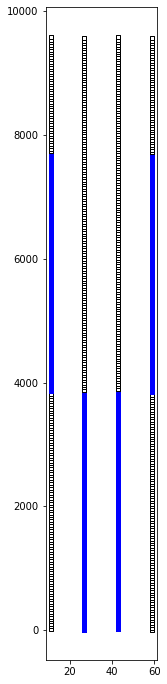

In [8]:
# Plot electrode locations using SGLXMetaToCoords
lfp.im.plot_electrodes()


In [9]:
# If you want an ImecMap object without having to load binary data, there are several ways to do that.
# All of the following are equivalent.
from .imec_map import ImecMap

im1 = ImecMap.from_bin(lfp_bin_path)
im2 = ImecMap.from_library("CheckPat_1shank", stream_type="LF")
im3 = ImecMap.CheckPat()
im3.stream_type = "LF"


In [10]:
# By default, data for both streams (LF and AP) are loaded,
# unless a single stream is specified by a bin file, argument,
# or by setting the map's stream_type property.
im4 = ImecMap.CheckPat()
display(im4.full)


,chan_id,bank,ref_id,ap_gain,lf_gain,ap_highpass,site,x,y,label,acq_order,usr_order,stream
0,0,0,0,500,250,1,0,27.0,0.0,AP0,0,0,AP
1,0,0,0,500,250,1,0,27.0,0.0,LF0,384,384,LF
6,3,0,0,500,250,1,3,43.0,20.0,AP3,3,1,AP
7,3,0,0,500,250,1,3,43.0,20.0,LF3,387,385,LF
8,4,0,0,500,250,1,4,27.0,40.0,AP4,4,2,AP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,378,1,0,500,250,1,762,11.0,7620.0,LF378,762,765,LF
762,381,1,0,500,250,1,765,59.0,7640.0,AP381,381,382,AP
763,381,1,0,500,250,1,765,59.0,7640.0,LF381,765,766,LF
764,382,1,0,500,250,1,766,11.0,7660.0,AP382,382,383,AP
